# Problem Set 1
### Due at noon Wedesday 10 April, submitted online via Canvas.

## Instructions (please read everything carefully)

* The questions are given in the cells, below. Your answers should be in this same notebook, beneath each question (insert as many cells as you need), with
  - text in markdown cells. Equations should be in $\LaTeX$
  - fully functional code, with comments so we can understand what you are doing. If you based any part of your code on someone else's initial implementation, cite appropriately.
  - outputs, in presentable format.
    - Plots should have clear titles, axis labels, and legends if needed.
    - Numerical answers should have a sensible number of digits with surrounding text that identifies what is being printed.

* Submit your notebook to Canvas for the specific assignment prior to the deadline. Please use a file name that includes your name and the problem set number, *e.g.*, pset1-Ritz.ipynb.

* Solutions will be posted soon after the deadline, and your work will be graded within one week (usually sooner).

* Problems are typically posted one week in advance. You are encouraged to work together on problems, but the actual code and the full notebook must be your own work.

* The time it takes to write code is often unpredictable, particularly at the beginning of the quarter. Start early.

* If anything is unclear, please ask! The Discussion Forum on Canvas is a convenient method that gives everyone the benefit of your question and the answer(s).



In [8]:
# these were discussed in lecture
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import sys
print(sys.version)

3.5.6 |Anaconda custom (64-bit)| (default, Aug 26 2018, 16:30:03) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## Problem 1
Warm up. In the cell below, write code that produces the following (each item of output on a different line):

  a) The text, "Hello, world."  (don't forget the comma and period. no, you do not need the quotation marks in the output.)
  
  b) The same thing as (a), in any other written language of your choice.
  
  c) Calculate the number of seconds in a typical week, and format the output as, "The number of seconds in a typical week, to 4 significant digits and in scientific notation is (your number here, correctly formatted)."


In [6]:
print("Hello, world.") # Part a
print("Hola, mundo.") # Part b, in spanish
# Part c
weeks = 1
days = 7*weeks
hours = 24 * days
minutes = 60 * hours
seconds = 60 * minutes
print("The number of seconds in a typical week, to 4 significant digits and in scientific notation is ", '{:.4e}'.format(seconds))
# Example for scientific formatting found from StackExchange

Hello, world.
Hola, el mundo.
The number of seconds in a typical week, to 4 significant digits and in scientific notation is  6.0480e+05


----------------------
## Problem 2

Subtractive error exploration. As noted in the textbook (section 3.1.2), the solution to the quadratic equation provides a clear example of subtractive errors. For $$ax^2+bx+c=0$$ the solutions are given by $$x_\pm=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$ or, equivalently, $$x_\pm^\prime=\frac{-2c}{b\pm\sqrt{b^2-4ac}}.$$

Interestingly, problems of finite machine precision arise when $b>>4ac$. See why? First, write a function that calculates the two solutions both ways (so, 4 results) for any $(a,b,c)$. Then, use it to explore:
  * follow the suggestion in the textbook by setting $a=b=1$ and $c=10^{-n}$ for $n=1, 2, 3,...$. Plot the log of the error (you will have to think about how to calculate the error, how to handle negative errors, and how to handle errors that, given finite precision, are stored as 0.) as a fuction of $n$ for $n=1...13$. BTW, be careful that you take the $\log_{10}$ not $\log_e$ (a.k.a. $\ln$).
  * repeat for a smaller value of $a$, say $10^{-3}$.
  * bonus (not required, to be done after you finish everything else on this problem set): make a two-dimensional image (something like the Mandelbrot images in the first lecture), or you can make a 3-d surface plot if you prefer (or both!), of the log of the error. The 2-d field should be $\log(c)$ on the horizontal axis and $\log(4ac)$ or $\log(a)$ on the vertical axis. Be sure to include the color scale or third axis to display the log of the error.

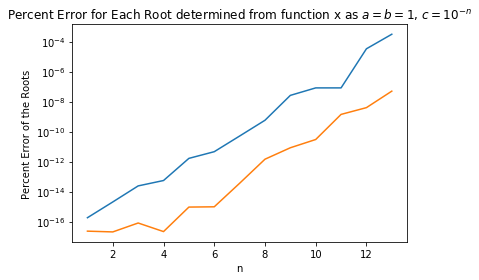

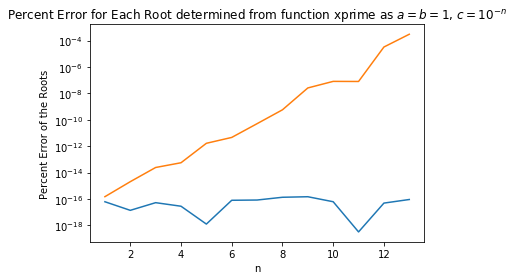

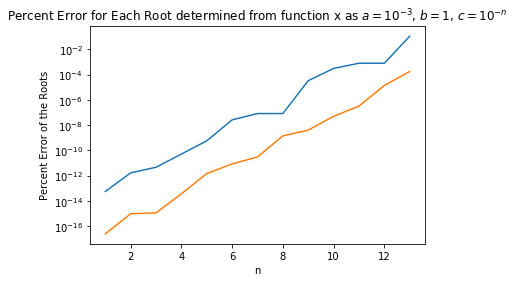

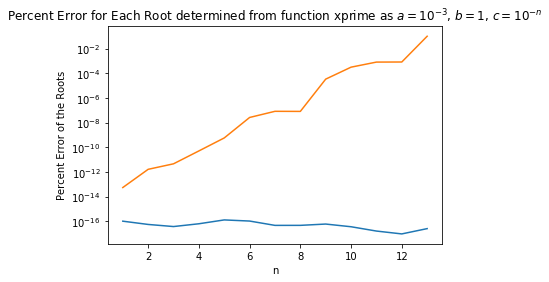

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def x(a, b, c):
    # Find the roots of ax^2 + bx + c = 0
    sol1 = (-b + (b**2 - 4*a*c)**0.5)/(2*a)
    sol2 = (-b - (b**2 - 4*a*c)**0.5)/(2*a)
    return (sol1, sol2)

def xprime(a, b ,c):
    # Find the roots of ax^2 + bx + c = 0 via the second equation
    sol1 = -2*c/(b + (b**2 - 4*a*c)**0.5)
    sol2 = -2*c/(b - (b**2 - 4*a*c)**0.5)
    return (sol1, sol2)

def xact(a, b, c): # get it? xact? Exact?
    a = np.float128(a)
    b = np.float128(b)
    c = np.float128(c)
    sol1 = -2*c/(b + (b**2 - 4*a*c)**0.5)
    sol2 = -2*c/(b - (b**2 - 4*a*c)**0.5)
    return (sol1, sol2)

def err(xact, notexact):
    return np.abs((xact - notexact))/np.abs(xact)

def errplot(errset, i):
    n = np.linspace(1, len(errset), len(errset))
    plt.plot(n, errset)
    plt.yscale("Log")
    if i == 0:
        plt.title("Percent Error for Each Root determined from function x as $a = b = 1$, $c = 10^{-n}$")
        plt.xlabel("n")
        plt.ylabel("Percent Error of the Roots")
    elif i == 1:
        plt.title("Percent Error for Each Root determined from function xprime as $a = b = 1$, $c = 10^{-n}$")
        plt.xlabel("n")
        plt.ylabel("Percent Error of the Roots")
    elif i == 2:
        plt.title("Percent Error for Each Root determined from function x as $a = 10^{-3}$, $b = 1$, $c = 10^{-n}$")
        plt.xlabel("n")
        plt.ylabel("Percent Error of the Roots")
    else:
        plt.title("Percent Error for Each Root determined from function xprime as $a = 10^{-3}$, $b = 1$, $c = 10^{-n}$")
        plt.xlabel("n")
        plt.ylabel("Percent Error of the Roots")
# First run with a = b = 1
a = 1
b = 1
xset = []
xprimeset = []
xactset = []
for n in range(1, 14): # counting starts at 0
    c = 10**-n
    xset.append(x(a, b, c))
    xprimeset.append(xprime(a, b, c))
    xactset.append(xact(a, b, c))
    
# Second run with a = 10^-3, b = 1
a = 10**-3
b = 1
xsetrun2 = []
xprimesetrun2 = []
xactsetrun2 = []
for n in range(1, 14): # counting starts at 0
    c = 10**-n
    xsetrun2.append(x(a, b, c))
    xprimesetrun2.append(xprime(a, b, c))
    xactsetrun2.append(xact(a, b, c))

# Convert lists to np arrays
xset = np.array(xset)
xprimeset = np.array(xprimeset)
xactset = np.array(xactset)
xsetrun2 = np.array(xsetrun2)
xprimesetrun2 = np.array(xprimesetrun2)
xactsetrun2 = np.array(xactsetrun2)

# Calculate Error
errset = err(xactset, xset)
errprimeset = err(xactset, xprimeset)
errset2 = err(xactsetrun2, xsetrun2)
errprimeset2 = err(xactsetrun2, xprimesetrun2)

allsets = [errset, errprimeset, errset2, errprimeset2]
# Plot the log10 of the error with respect to n
for i, error_set in enumerate(allsets):
    plt.figure()
    errplot(error_set, i)

-------------
## Problem 3

Following an idea in the textbook around equation (3.13): calculating the sum of a simple series must be done carefully. The book suggests looking at 

$$S^\text{(up)} = \sum_{n=1}^{N} \frac{1}{n}$$

which is clearly finite for finite $N$. 

Of course, on paper the result is the same whether you sum the series upwards from $n = 1$ or downwards from $n = N$, *i.e.*,
$$
S^\text{(down)} = \sum_{n=N}^{1} \frac{1}{n}
$$

Surprisingly, on a computer with finite precision, we find that $S^\text{(up)} \neq S^\text{(down)}$.

(a) First, write a function that calculates $S^\text{(up)}$ and $S^\text{(down)}$ in single precision as a function of $N$.


In [11]:
import numpy as np
def Sup(n):
    total = 0
    vals = np.linspace(1, n, n+1)
    for num in vals:
        total += num**-1
    return total
def Sdown(n):
    total = 0
    vals = np.linspace(n, 1, n+1)
    for num in vals:
        total += num**-1
    return total

(b) Now, calculate the two sums for $N = 10^n$, with $n = 2, 3,...,7$, and display the numbers, formatted for clear comparison. Then, make a log-log plot of 

$$(S^\text{(up)}-S^\text{(down)})/(|(S^\text{(up)}|+|(S^\text{(down)}|) \:\:\:\text{vs.}\:\: N$$. 

Notice any interesting features? Explain why (up) is less accurate than (down).


Summing up: 	 	 Summing down:
5.187377517639621 	 5.1873775176396215
7.485470860550343 	 7.485470860550341
9.787606036044348 	 9.787606036044386
12.090146129863335 	 12.090146129863408
14.392726722864989 	 14.392726722865772
16.695311365857272 	 16.695311365859965


Text(0, 0.5, 'Sum of $n^{-1}$')

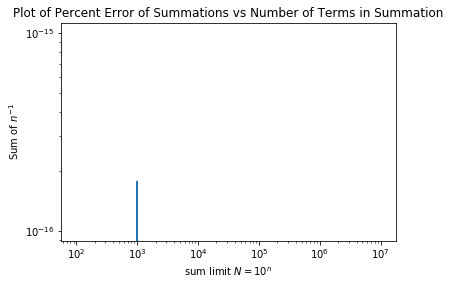

In [68]:
import numpy as np
import matplotlib.pyplot as plt
def Sup(n):
    total = 0
    vals = np.float64(np.linspace(1, n, n))
    for num in vals:
        total += num**-1
    return total
def Sdown(n):
    total = 0
    vals = np.float64(np.linspace(n, 1, n))
    for num in vals:
        total += num**-1
    return total
def logcomp(up, down):
    up = np.float64(up)
    down = np.float64(down)
    return (np.float64(up - down)/(np.abs(up) + np.abs(down)))
comps = []
nvals = []
print("Summing up: \t \t Summing down:")
for n in range(2, 8):
    N = 10**n
    nvals.append(N)
    sup = Sup(N)
    sdown = Sdown(N)
    comps.append(logcomp(sup, sdown))
    print(sup, "\t", sdown)
comps = np.array(comps)
nvals = np.array(nvals)
plt.loglog(nvals, comps)
plt.title("Plot of Percent Error of Summations vs Number of Terms in Summation")
plt.xlabel("sum limit $N = 10^n$")
plt.ylabel("Sum of $n^{-1}$")

A computer stores a number in floating point and in scientific notation, so the exponenent occupies some space in memory. Summing up means we're starting our summation with a low number. In this series, we are summing over $\frac{1}{n}$
so a small n leads to a larger number being added. This meams at the beginning of the sum that space in memory for the exponent is more consistently being rewritten and we are losing those lower order digits. Starting in reverse, however, means we calculate those lower order digits first, and when we reach the largest terms in the series the approximations we inevitably have to make are made on more accurate numbers.

(c) Finally, calculate $S^\text{(up)}$ and $S^\text{(down)}$ in double precision, and show that in double precision they agree much better.

Summing up: 	 	 Summing down:
5.1873775176396202616 	 5.18737751763962026
7.4854708605503449143 	 7.4854708605503449126
9.7876060360443823 	 9.787606036044382267
12.090146129863427907 	 12.090146129863427962
14.392726722865723355 	 14.392726722865723647
16.695311365859851377 	 16.695311365859851913


Text(0, 0.5, 'Sum of $n^{-1}$')

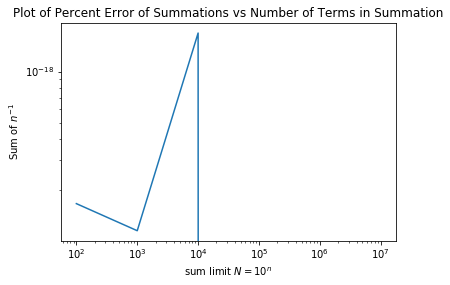

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def Sup(n):
    total = 0
    vals = np.float128(np.linspace(1, n, n))
    for num in vals:
        total += np.float128(num**-1)
    return total
def Sdown(n):
    total = 0
    vals = np.float128(np.linspace(n, 1, n))
    for num in vals:
        total += num**-1
    return total
def logcomp(up, down):
    up = np.float128(up)
    down = np.float128(down)
    return (up - down)/(np.abs(up) + np.abs(down))
comps = []
nvals = []
print("Summing up: \t \t Summing down:")
for n in range(2, 8):
    N = 10**n
    nvals.append(N)
    sup = Sup(N)
    sdown = Sdown(N)
    comps.append(logcomp(sup, sdown))
    print(sup, "\t", sdown)
comps = np.array(comps)
nvals = np.array(nvals)
plt.loglog(nvals, comps)
plt.title("Plot of Percent Error of Summations vs Number of Terms in Summation")
plt.xlabel("sum limit $N = 10^n$")
plt.ylabel("Sum of $n^{-1}$")


-------------------
## Problem 4

We'll use the sine function to explore a variety of interesting issues related to numerical precision. Recall, the Maclaurin series for $\sin(x)$ is

$$\sin(x)=x-\frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} ... = \sum_{n=1}^\infty\frac{(-1)^{n-1} x^{2n-1}}{(2n-1)!}$$

First, we must make an approximation by summing the first $N$ terms. Second, that algorithm is worrisome because 

   - factorials are computationally expensive and are very large for large $N$. For large $x$ we must make $N$ large, as we will see. 
   - dividing two large numbers should be avoided whenever possible: you risk overflows in the numerator and/or denominator when the actual quotient is not large.
   
So, although the infinite series is, in principle, OK, with a radius of convergence that encompasses all reals (yes, you might say it's not clever to do the expansion around $x=0$), it only works for all cases on a calculator with unlimited capacity, which does not exist.


(a) First, let's do the (somewhat) wrong thing and see the consequences. Write a function that returns the nth term for some $x$ using the formula above (factorials and all). Explore: plot the value of each term for $x=1.$, $x=10.$, and $x=50.$, vs. $N$, and quantify where you get into trouble with this algorithm.


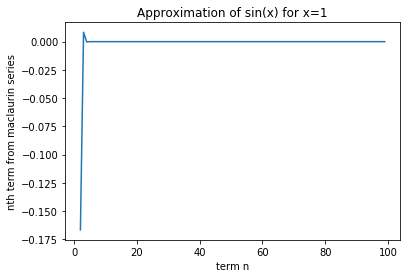

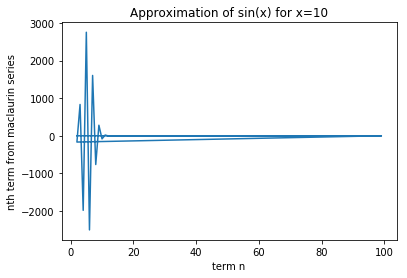

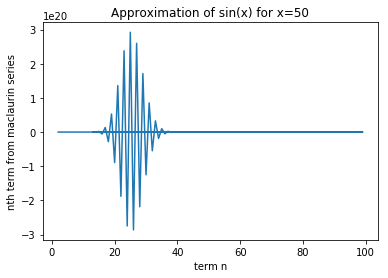

In [7]:
import numpy as np
import scipy as sp
import math as m
import matplotlib.pyplot as plt
def mac_sin(x, N):
    # Calculate sin(x) from the maclaurin series up to N terms
    term = []
    for n in range(1, N+1):
        num = (x)**(2*n-1) * (-1)**(n-1)
        den = sp.math.factorial(2*n - 1)
        term.append(num / den)
    return np.array(term)
def ntherm(x,N,n):
    term = mac_sin(x, N)
    return term[n]
yvals = []
xvals = []
for x in [1, 10, 50]:
    for N in range(2, 100):
        xvals.append(N)
        yvals.append(ntherm(x,N,N-1))
    plt.figure()
    plt.plot(xvals, yvals)
    plt.title("Approximation of sin(x) for x=" + str(x))
    plt.xlabel("term n")
    plt.ylabel("nth term from maclaurin series")

(b) We can do much better. Have a look at the textbook section 2.5.1, and make a new version of your function using that method. Make a similar plot showing this is more robust. Make the same plot as in part (a), but also add $x=100.$, along with some other large $x$ values. You might want to let $N$ be larger. However, even though we can calculate the terms now, it isn't clear it's helpful. See below.

sin(0) is roughly:  0
sin(10) is roughly:  -82.20635246624333
sin(100) is (not roughly):  -1.4487149702029147e+26


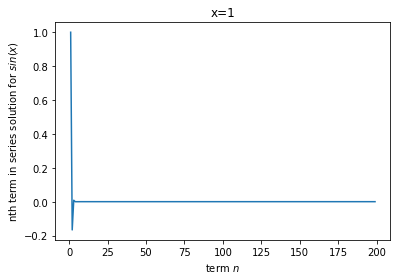

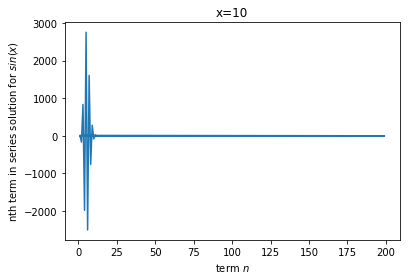

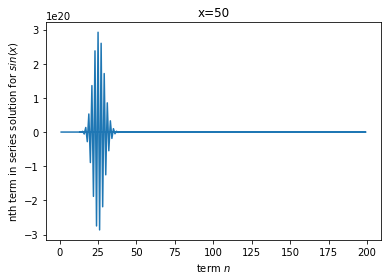

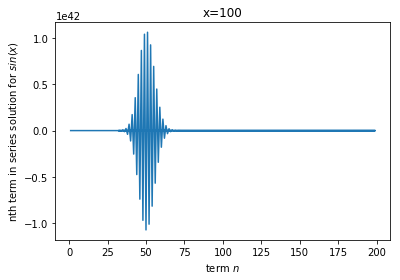

In [6]:
answers = dict() # For dynamics programming purposes, stores already calculated answers
def totsin(x):
    # Returns the approximation of sin(x)
    n = 1
    tot = 0
    while answers.get((x,n)) is not None:
        tot += answers[(x,n)]
        n += 1
    return tot
def sin(x, n):
    # function calculates the first n terms for sin(x)
    if n == 1: # Base Case
        answers[(x,n)] = x # Update the book of answers
        return x # sin(x) \approx x for n=1
    elif answers.get((x,n)) is not None: return answers[(x, n)] # Don't calculate anything we've aready calculated...
    else: # Recursive Case
        entry = ((-x**2)/((2*n - 1)*(2*n - 2))) * sin(x, n-1) # recursive call
        answers[(x,n)] = entry
        return entry
print("sin(0) is roughly: ",sin(0,1)) # Test
print("sin(10) is roughly: ",sin(10,10))
xaxis = []
yaxis = []
for x in [1, 10, 50, 100]:
    for n in range(1, 200):
        yaxis.append(sin(x,n))
        xaxis.append(n)
    plt.figure()
    plt.plot(xaxis, yaxis)
    plt.title("x="+str(x))
    plt.xlabel("term $n$")
    plt.ylabel("nth term in series solution for $sin(x)$")
print("sin(100) is (not roughly): ", totsin(100))

(c) You might be wondering, how does this series produce oscillations, and how does $\pi$ come out of it? It isn't obvious that this series should have the same value whenever you add or subtract $2m\pi$, where $m=1,2,3,...$. Also, having done all this work, you may be itching to see the actual results! 

Plot $\sin(x)$ in the range $-10<x<10$ for $N=1,2, 3, ..., 15$. On the same plot, show $\sin(x)$ using a built-in math function such as the one in numpy. 

You'll see that, for insufficiently large $N$, the result of your algorithm wanders far outside the valid range (-1,1) of the sine function. To make the plot useful, you will have to truncate or limit the value when it's outside the valid range (for example, impose that the absolute value of the result cannot be larger than 2). 

Aside: notice that, in this case, imposing periodic boundary conditions ($\sin(x+n\pi) = \sin(x)$) would have an effect that is similar, to finite precision, to that of adding more terms in the series. Remarkable!

In [5]:
import numpy as np
import matplotlib.pyplot as plt
xdata = np.linspace(-10,10,500)
ydata = []
yexact = []
for x in xdata:
    sin(x, 15)
    ydata.append(totsin(x))
    yexact.append(np.sin(x))
plt.plot(xdata, ydata, alpha = 0.5, label="Maclaurin Series Approximation")
plt.plot(xdata, yexact, alpha = 0.5, label="Numpy Answer", color='red')
plt.legend(loc=1)
plt.grid(True)


NameError: name 'sin' is not defined

(d) Now, we need an accuracy estimator to decide how many terms to keep, and we'll do this by comparing the value of the nth term with the running current total. When that's $<10^{-8}$ you can stop. Make a plot of the number of terms, $N$, needed as a function of $x$. Notice two things: 
  1. there is a range of $x$ for which the result is wrong, even though the algorithm completes according to the accuracy estimator (so this is a failure) and 
  2. there is some point at which the alogorithm never completes. The trajectories in parts (a) and (b) give some perspective on this. 


Text(0, 0.5, 'Percent Error')

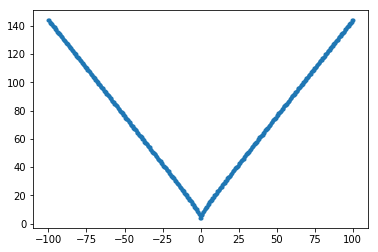

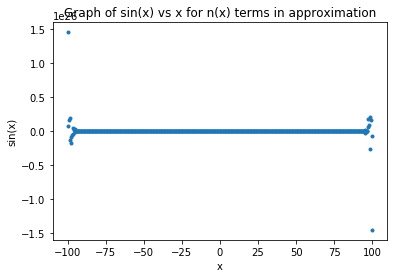

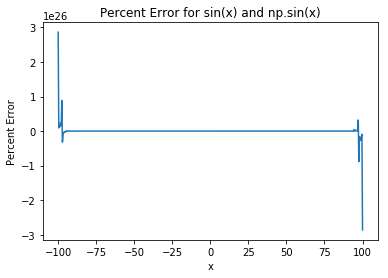

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def n_needed_terms(x):
    n = 1
    while np.abs(sin(x, n)) > 10**-8:
        n+=1
    return n

xdata = np.linspace(-100, 100, 500)
ydata = []
for x in xdata:
    ydata.append(n_needed_terms(x)) 
plt.plot(xdata, ydata, marker=".", linestyle="none")

sindata = []
yexactdata = []
for i in range(len(xdata)):
    sindata.append(totsin(xdata[i]))
    yexactdata.append(np.sin(xdata[i]))
sindata = np.array(sindata)
yexactdata = np.array(yexactdata)
plt.figure()
plt.plot(xdata, sindata, linestyle="none", marker=".")
plt.title("Graph of sin(x) vs x for n(x) terms in approximation")
plt.xlabel("x")
plt.ylabel("sin(x)")

percent_error = np.abs(sindata - yexactdata)/yexactdata
plt.figure()
plt.plot(xdata, percent_error,)
plt.title("Percent Error for sin(x) and np.sin(x)")
plt.xlabel("x")
plt.ylabel("Percent Error")

The algorithm is accurate under 2 percent error for $x <= \pm 40$, diverges slowly for increasing x, then diverges rapidly. It is able to get an (extremely inaccurate) value for $x = 100$ and for $x > 100$ memory overflows cause the program to crash.

(f) Finally, let's look at the accuracy trajectory: show the error as a function of $N$ for a range of $x$ values (do at least $x=5.$ and $x=0.1$), similar to what we did in lecture for the exponential (see Lectures1.ipynb). Feel free to explore and to present the information in whatever way you think is instructive. What is this telling you?

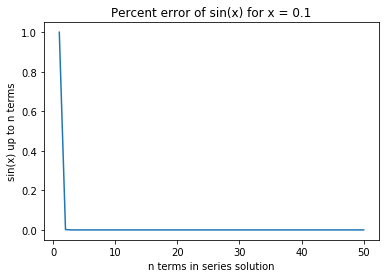

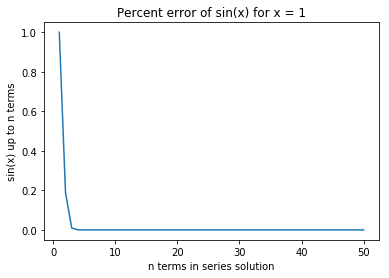

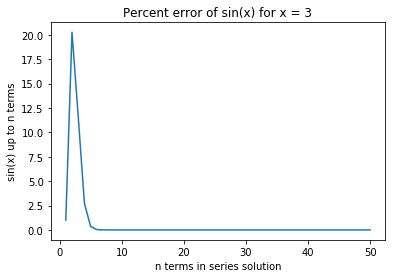

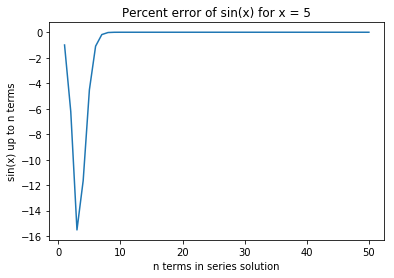

In [30]:
for x in [0.1, 1, 3, 5]:
    sin_up_to_n_terms = []
    nthterm = []
    for N in np.linspace(1, 50, 50):
        nthterm.append(sin(x, N))
    nthterm = np.array(nthterm)
    for i in range(0, len(nthterm)):
        sin_up_to_n_terms.append(np.sum(nthterm[:i]))
    sin_up_to_n_terms = np.array(sin_up_to_n_terms)
    exact = np.sin(x)
    error = np.abs(sin_up_to_n_terms - exact)/exact
    plt.figure()
    plt.plot(np.linspace(1,50,50), error)
    plt.title("Percent error of sin(x) for x = "+str(x))
    plt.xlabel("n terms in series solution")
    plt.ylabel("sin(x) up to n terms")
    

----------------------------
## Problem 5
Read section 3.2 (Error in Bessel Functions) of the texbook, and do the five-part problem in section 3.2.2. The principal author of the book says that students really enjoy this problem -- is the author right?

In [79]:
# your code here